In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from plotly.subplots import make_subplots  

In [42]:
#Import CSV file into a dataframe
df = pd.read_csv('/Users/pengruizeng/Desktop/Demo/Walmart/walmart-sales-dataset-of-45stores.csv')

In [43]:
len(df)

6435

In [44]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [45]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [46]:
null_val = df.isnull().sum()
null_val 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Univariate Analysis

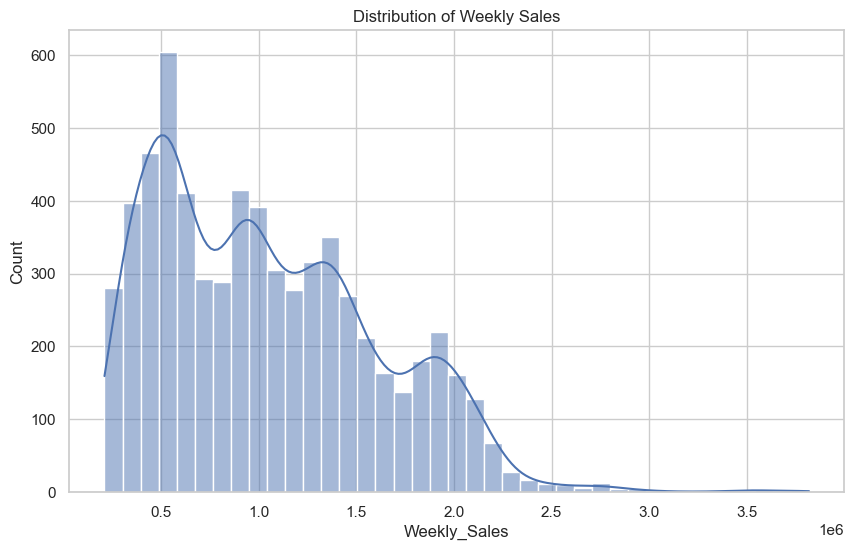

In [47]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot for 'Weekly_Sales'
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], kde=True)
plt.title('Distribution of Weekly Sales')
plt.show()

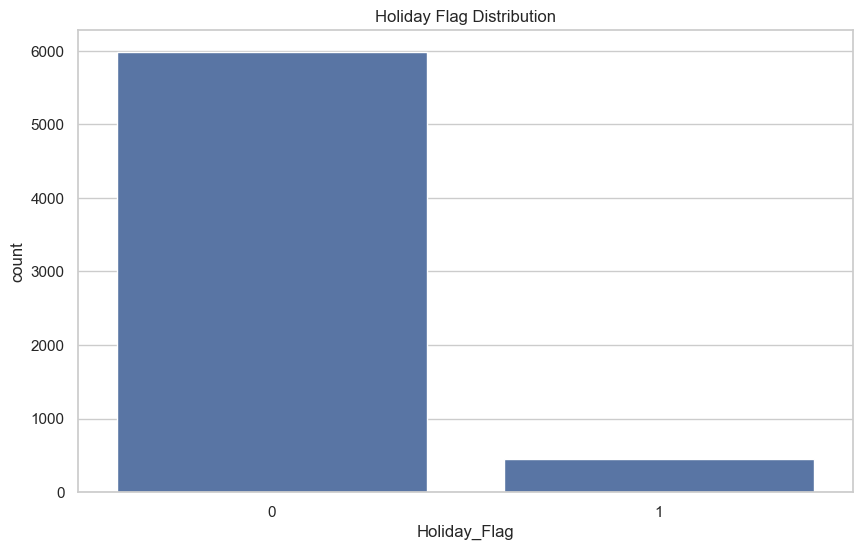

In [48]:
# Plot for 'Holiday_Flag'
plt.figure(figsize=(10, 6))
sns.countplot(x='Holiday_Flag', data=df)
plt.title('Holiday Flag Distribution')
plt.show()

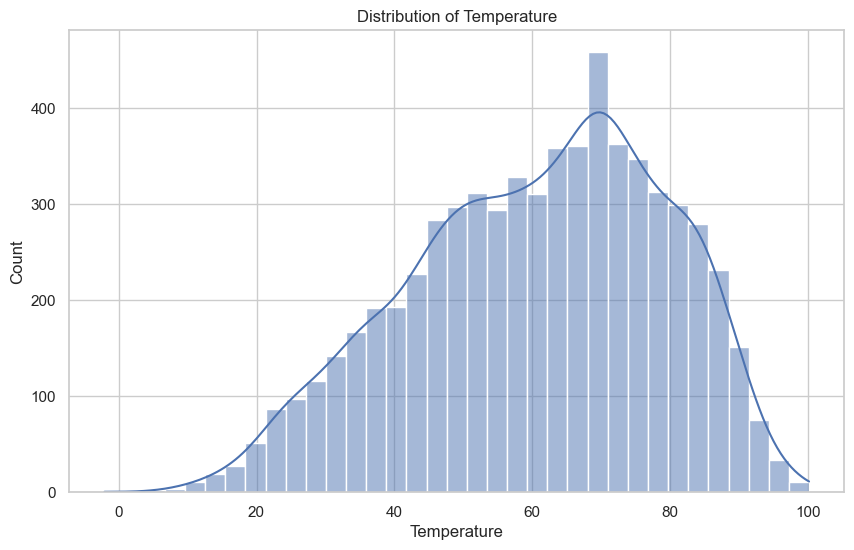

In [49]:
# Plot for 'Temperature'
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature'], kde=True)
plt.title('Distribution of Temperature')
plt.show()

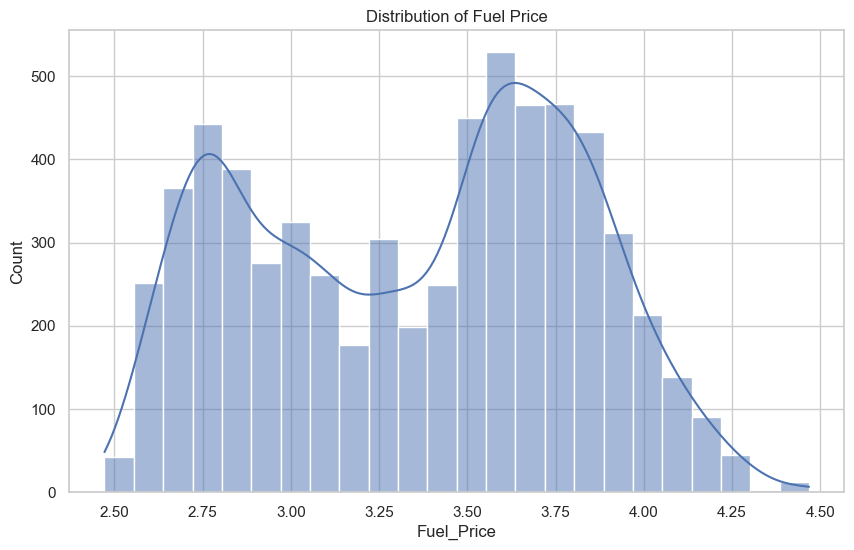

In [50]:
# Plot for 'Fuel_Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Fuel_Price'], kde=True)
plt.title('Distribution of Fuel Price')
plt.show()

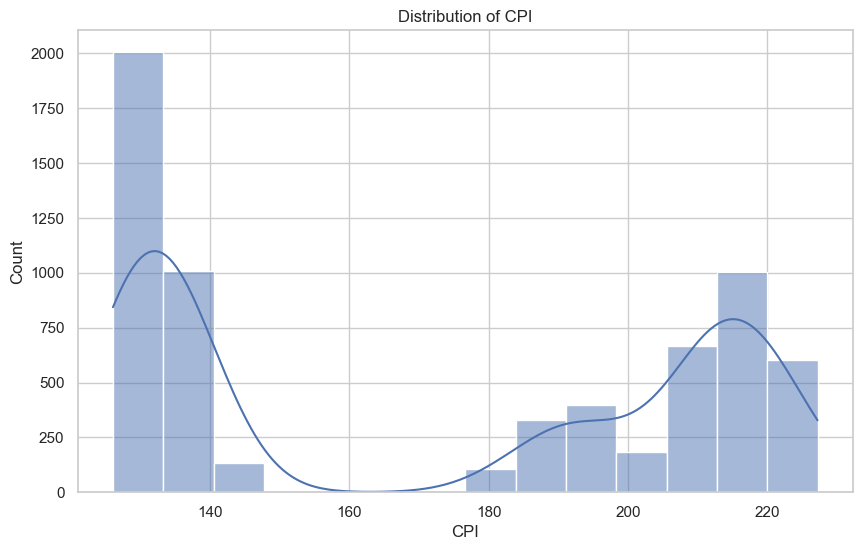

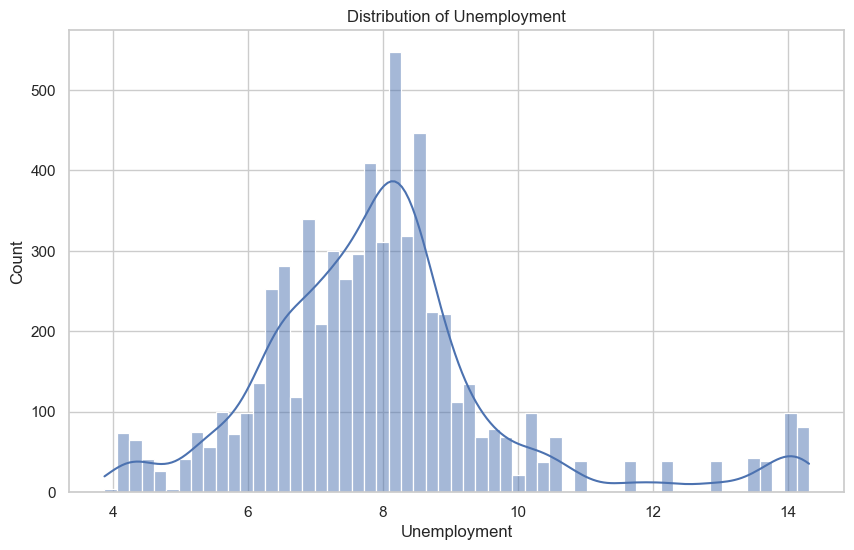

In [51]:
# Plot for 'CPI'
plt.figure(figsize=(10, 6))
sns.histplot(df['CPI'], kde=True)
plt.title('Distribution of CPI')
plt.show()

# Plot for 'Unemployment'
plt.figure(figsize=(10, 6))
sns.histplot(df['Unemployment'], kde=True)
plt.title('Distribution of Unemployment')
plt.show()

### Analysing the store with highest sales and it's numbers
 Summer / Winter / Whole 3 years 

In [52]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract month from Date column
df['Month'] = df['Date'].dt.month

# Define summer and winter months
summer_months = [6, 7, 8]
winter_months = [12, 1, 2]
all_time = [1,2,3,4,5,6,7,8,9,10,11,12]

# Filter data for summer and winter months
summer_sales = df[df['Month'].isin(summer_months)]
winter_sales = df[df['Month'].isin(winter_months)]
all_time_sales = df[df['Month'].isin(all_time)]

# Group by Store and aggregate Weekly_Sales for summer and winter
summer_sales_by_store = summer_sales.groupby('Store')['Weekly_Sales'].sum().reset_index()
winter_sales_by_store = winter_sales.groupby('Store')['Weekly_Sales'].sum().reset_index()
all_time_sales_by_store = all_time_sales.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Find the store with the highest sales in summer
max_summer_sales_store = summer_sales_by_store.loc[summer_sales_by_store['Weekly_Sales'].idxmax()]

# Find the store with the highest sales in winter
max_winter_sales_store = winter_sales_by_store.loc[winter_sales_by_store['Weekly_Sales'].idxmax()]

# Find the store with the highest sales in winter
max_all_time_sales_store = all_time_sales_by_store.loc[all_time_sales_by_store['Weekly_Sales'].idxmax()]

print("Store with highest summer sales:", max_summer_sales_store['Store'], "with sales:", max_summer_sales_store['Weekly_Sales'])
print("Store with highest winter sales:", max_winter_sales_store['Store'], "with sales:", max_winter_sales_store['Weekly_Sales'])
print("Store with highest winter sales:", max_all_time_sales_store['Store'], "with sales:", max_all_time_sales_store['Weekly_Sales'])

Store with highest summer sales: 20.0 with sales: 82318936.49
Store with highest winter sales: 20.0 with sales: 67912185.5
Store with highest winter sales: 20.0 with sales: 301397792.46


## Visulaisation on Summer , Winter & all-time Sales from (2010-2012) 

In [53]:
# Merge the dataframes on Store to have both summer, winter, and all-time sales in one dataframe
sales_comparison = pd.merge(summer_sales_by_store, winter_sales_by_store, on='Store', suffixes=('_Summer', '_Winter'))
sales_comparison = pd.merge(sales_comparison, all_time_sales_by_store, on='Store')
sales_comparison.rename(columns={'Weekly_Sales': 'Weekly_Sales_All_Time'}, inplace=True)

# Create an interactive bar chart using Plotly
fig = go.Figure()

# Add summer sales to the bar chart
fig.add_trace(go.Bar(
    x=sales_comparison['Store'],
    y=sales_comparison['Weekly_Sales_Summer'],
    name='Summer Sales',
    marker_color='rgb(26, 118, 255)'
))

# Add winter sales to the bar chart
fig.add_trace(go.Bar(
    x=sales_comparison['Store'],
    y=sales_comparison['Weekly_Sales_Winter'],
    name='Winter Sales',
    marker_color='rgb(55, 83, 109)'
))

# Add all-time sales to the bar chart
fig.add_trace(go.Bar(
    x=sales_comparison['Store'],
    y=sales_comparison['Weekly_Sales_All_Time'],
    name='All-Time Sales',
    marker_color='rgb(50, 205, 50)'
))

# Update layout for better visualization
fig.update_layout(
    title='Comparison of Summer, Winter, and All-Time Sales by Store',
    xaxis=dict(title='Store'),
    yaxis=dict(title='Total Weekly Sales'),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

# Show the plot
fig.show()

## Contribution from TOP 10 stores : Comparing with the rest of stores 

In [54]:
# Sort stores by weekly sales in descending order
df_sorted = df.sort_values(by='Weekly_Sales', ascending=False)

# Calculate total sales of top 10 stores
top_10_sales = df_sorted.head(10)['Weekly_Sales'].sum()

# Calculate total sales of all stores
total_sales = df_sorted['Weekly_Sales'].sum()

# Calculate percentage contribution of top 10 stores to total sales
percentage_contribution = (top_10_sales / total_sales) * 100

print("Total weekly sales of top 10 stores:", top_10_sales)
print("Total weekly sales of all stores:", total_sales)
print("Percentage contribution of top 10 stores to total sales:", percentage_contribution)

Total weekly sales of top 10 stores: 36169568.77
Total weekly sales of all stores: 6737218987.110001
Percentage contribution of top 10 stores to total sales: 0.5368620025443958


Number of years in the dataset 

In [55]:
# Assuming df is your DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract the year from the Date column
df['Year'] = df['Date'].dt.year

# Get the unique years
unique_years = df['Year'].unique()

# Count the number of unique years
num_years = len(unique_years)

# Print the results
print("Unique years in the dataset:", unique_years)
print("Number of years of data:", num_years)

Unique years in the dataset: [2010 2011 2012]
Number of years of data: 3


Cumulative weekly sum

In [56]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Resample data to weekly frequency and aggregate Weekly_Sales
weekly_sales = df['Weekly_Sales'].resample('W').sum()

print(weekly_sales)

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
                 ...     
2012-09-30    43734899.40
2012-10-07    47566639.31
2012-10-14    46128514.25
2012-10-21    45122410.57
2012-10-28    45544116.29
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64


# WEEKLY SALES TIME SERIES DATA & TIME SERIES DECOMPENSATION
(Observed, Trend, Seasonal, Residual)

In [57]:
# Assuming 'weekly_sales' is your time series data

# Plot the time series
fig = px.line(weekly_sales, title='Weekly Sales Over Time')
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Sales'
)
fig.show()

# Decompose the time series
decomposition = seasonal_decompose(weekly_sales, model='additive')

# Create subplots
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=('Observed', 'Trend', 'Seasonal', 'Residual'))

# Observed
fig.add_trace(go.Scatter(x=decomposition.observed.index, y=decomposition.observed, mode='lines', name='Observed'), row=1, col=1)

# Trend
fig.add_trace(go.Scatter(x=decomposition.trend.index, y=decomposition.trend, mode='lines', name='Trend'), row=2, col=1)

# Seasonal
fig.add_trace(go.Scatter(x=decomposition.seasonal.index, y=decomposition.seasonal, mode='lines', name='Seasonal'), row=3, col=1)

# Residual
fig.add_trace(go.Scatter(x=decomposition.resid.index, y=decomposition.resid, mode='lines', name='Residual'), row=4, col=1)

fig.update_layout(height=800, title_text='Time Series Decomposition')
fig.show()

# Summary statistics
summary_stats = weekly_sales.describe()
print(summary_stats)

count    1.430000e+02
mean     4.711342e+07
std      5.444206e+06
min      3.959985e+07
25%      4.488059e+07
50%      4.624390e+07
75%      4.779202e+07
max      8.093142e+07
Name: Weekly_Sales, dtype: float64


In [58]:
# ADF Test
result = adfuller(weekly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if necessary
weekly_sales_diff = weekly_sales.diff().dropna()

# Re-check stationarity
result_diff = adfuller(weekly_sales_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

ADF Statistic: -5.90829795718633
p-value: 2.6759791589860825e-07
ADF Statistic (Differenced): -6.699469309617223
p-value (Differenced): 3.922578707076687e-09


Hypothesis testing according to the p-value

In [59]:
# Ho : Data is not stationary 
# H1 : Data is stationary 

if result_diff[1] > 5:      #result_diff[1] = p-value
    print("we are accepting the null hypothesis")
else:
    print("we are rejecting the null hypothesis and accepting the alternate hypothesis")

we are rejecting the null hypothesis and accepting the alternate hypothesis


# ARIMA MODEL fit with order p = 1 , d = 1 , q= 1 


In [60]:
# Fit ARIMA model (example with ARIMA(1,1,1))
model = ARIMA(weekly_sales, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2407.205
Date:                Thu, 24 Apr 2025   AIC                           4820.410
Time:                        20:03:24   BIC                           4829.277
Sample:                    02-07-2010   HQIC                          4824.013
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4556      0.065      6.965      0.000       0.327       0.584
ma.L1         -0.9767      0.038    -25.432      0.000      -1.052      -0.901
sigma2      3.067e+13   7.95e-16   3.86e+28      0.0

### Visualisation 

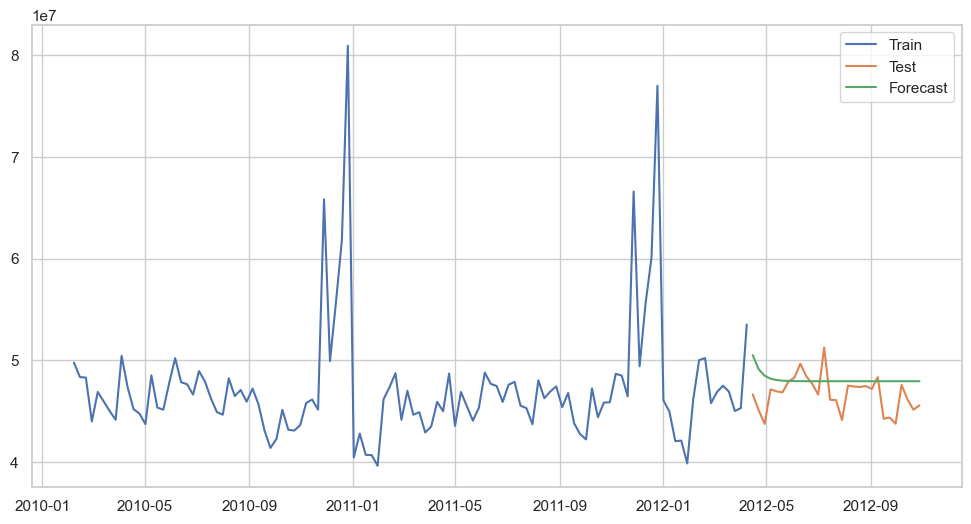

In [61]:
# Train-test split
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[0:train_size], weekly_sales[train_size:]

# Fit the model on training data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


### Grid Search 

In [62]:
import itertools
import warnings

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None

warnings.filterwarnings("ignore")  

for order in pdq:
    try:
        model = ARIMA(weekly_sales, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
    except:
        continue

print(f"Best ARIMA Parameters: {best_order}, Best AIC: {best_aic}")

Best ARIMA Parameters: (2, 0, 2), Best AIC: 4814.786555597671


In [63]:
model_2_0_2 = ARIMA(weekly_sales, order=(2,0,2))
model_2_0_2_fit = model_2_0_2.fit()
print(model_2_0_2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2401.393
Date:                Thu, 24 Apr 2025   AIC                           4814.787
Time:                        20:03:24   BIC                           4832.564
Sample:                    02-07-2010   HQIC                          4822.010
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   1.25e-08   3.78e+15      0.000    4.71e+07    4.71e+07
ar.L1         -0.9716      0.090    -10.826      0.000      -1.147      -0.796
ar.L2         -0.3639      0.083     -4.362      0.0

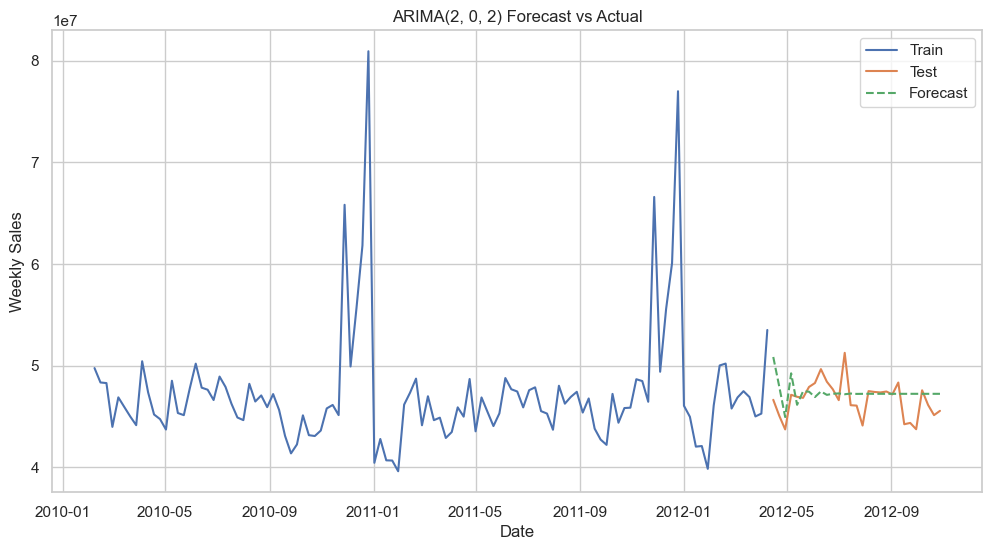

In [64]:
# Train-test split
train_size = int(len(weekly_sales) * 0.8)
train, test = weekly_sales[0:train_size], weekly_sales[train_size:]

# Fit the ARIMA(2, 0, 2) model on training data
model = ARIMA(train, order=(2, 0, 2))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title("ARIMA(2, 0, 2) Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate error metrics
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('MAPE:', mape)

MSE: 3810078083088.2124
RMSE: 1951942.131080789
MAE: 1527979.6439951505
MAPE: 3.3021199201186917


results of loss function 

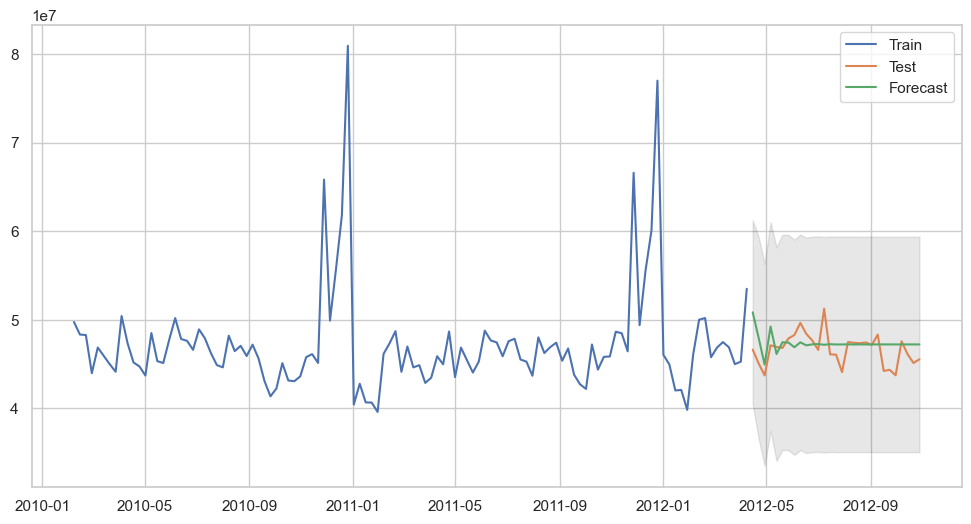

In [66]:
# Forecast with confidence intervals
forecast_result = model_fit.get_forecast(steps=len(test))
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_values, label='Forecast')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.legend()
plt.show()

# SARIMA MODEL


                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -970.926
Date:                            Thu, 24 Apr 2025   AIC                           1951.853
Time:                                    20:03:30   BIC                           1962.407
Sample:                                02-07-2010   HQIC                          1955.989
                                     - 04-08-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1615      1.209      0.134      0.894      -2.209       2.532
ma.L1         -0.2769      1.188   

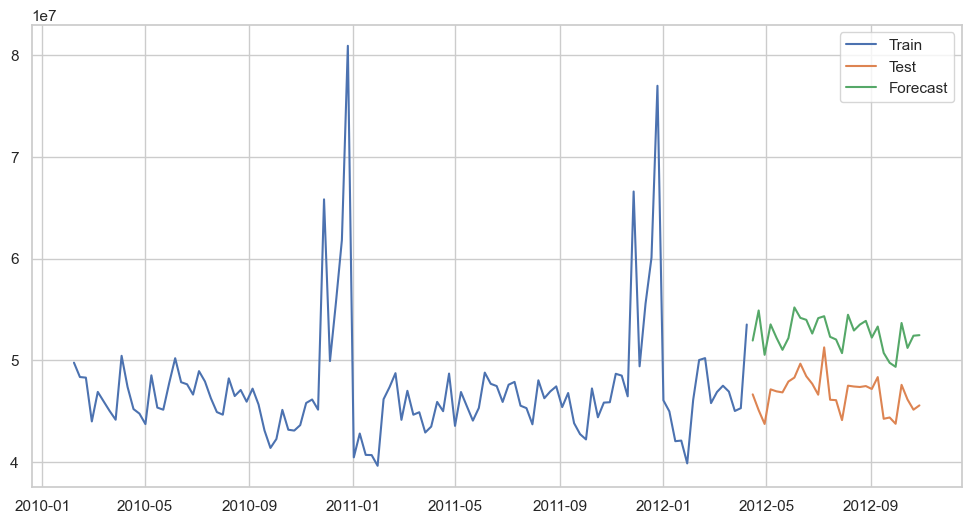

SARIMA MSE: 36425092611746.65
SARIMA RMSE: 6035320.4232871225
SARIMA MAE: 5903987.810777181
SARIMA MAPE: 12.71185164223392


In [67]:
# Split the data into train and test sets
train = weekly_sales[:int(0.8*len(weekly_sales))]
test = weekly_sales[int(0.8*len(weekly_sales)):]

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))  # Example seasonal order
sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())

# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_forecast = pd.Series(sarima_forecast, index=test.index)

# Remove NaN values from the test and forecast series
test_clean = test.dropna()
sarima_forecast_clean = sarima_forecast.dropna()

# Ensure both series align correctly
common_index = test_clean.index.intersection(sarima_forecast_clean.index)
test_aligned = test_clean.loc[common_index]
sarima_forecast_aligned = sarima_forecast_clean.loc[common_index]

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sarima_forecast, label='Forecast')
plt.legend()
plt.show()

# Calculate error metrics
sarima_mse = mean_squared_error(test_aligned, sarima_forecast_aligned)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test_aligned, sarima_forecast_aligned)
sarima_mape = np.mean(np.abs((test_aligned - sarima_forecast_aligned) / test_aligned)) * 100

print('SARIMA MSE:', sarima_mse)
print('SARIMA RMSE:', sarima_rmse)
print('SARIMA MAE:', sarima_mae)
print('SARIMA MAPE:', sarima_mape)

### Model Diagnostics

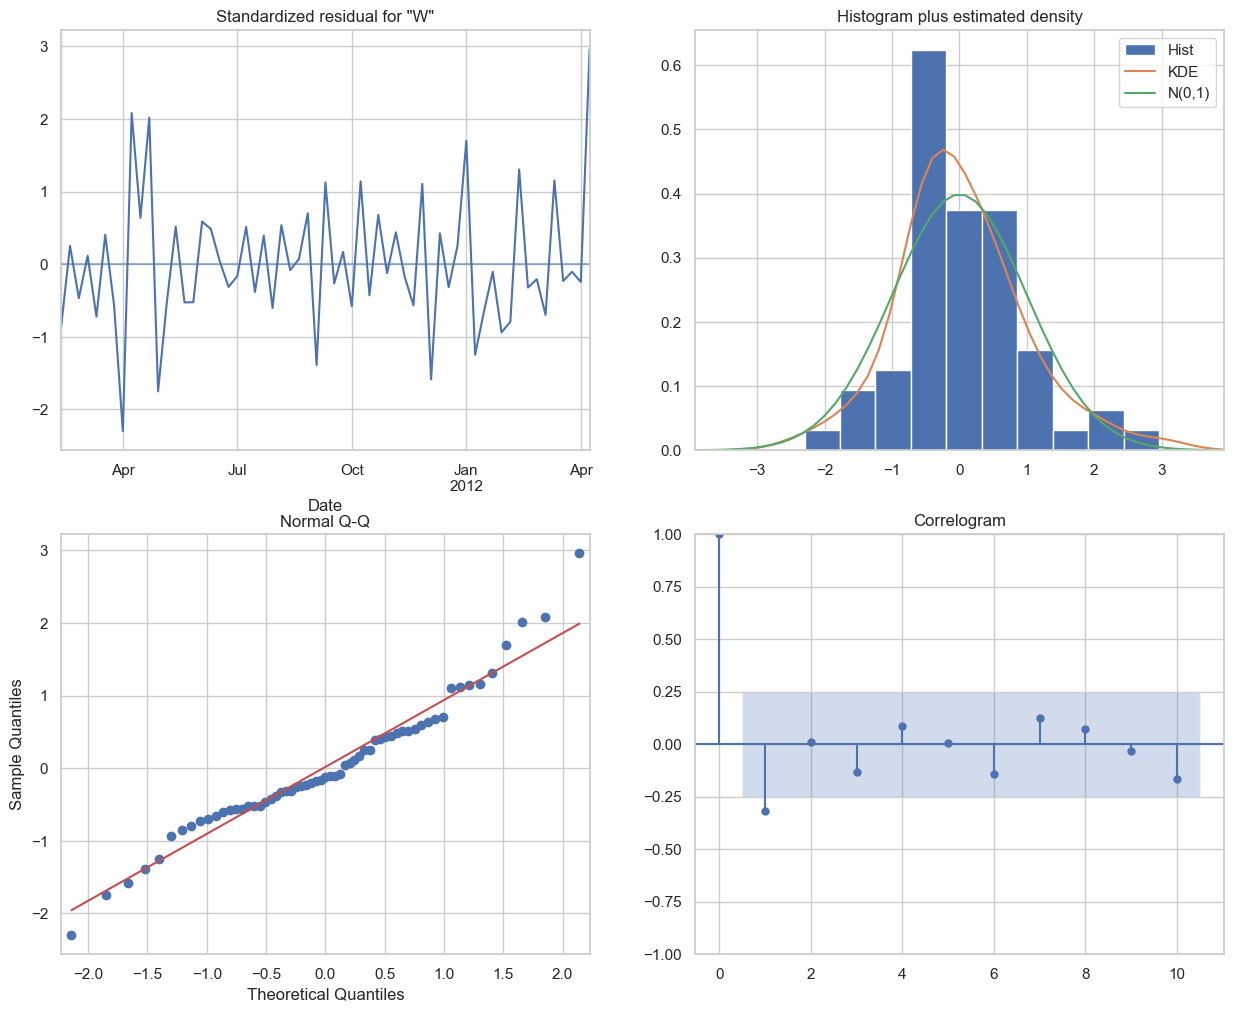

In [68]:
sarima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

### hyper parameter tuning : to find the best set of parameters for better predcition and loss near 0

In [69]:
import itertools
import warnings
warnings.filterwarnings("ignore")

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q, and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q, and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)
            results = mod.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
        except:
            continue

print(f'Best SARIMA parameters: {best_params}')

Best SARIMA parameters: ((0, 1, 1), (0, 1, 1, 52))


### Fitting the best parameters 

In [70]:
# Fit the best model
best_order, best_seasonal_order = best_params
sarima_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)
print(sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       Weekly_Sales   No. Observations:                  114
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                -112.141
Date:                            Thu, 24 Apr 2025   AIC                            230.281
Time:                                    20:05:13   BIC                            230.119
Sample:                                02-07-2010   HQIC                           228.276
                                     - 04-08-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0198      0.492      0.040      0.968      -0.944       0.983
ma.S.L52       0.3464      0.145   

### Checking the test set with predicted outcome

#### Model can't predict well with the depth but working well with the pattern recognition 

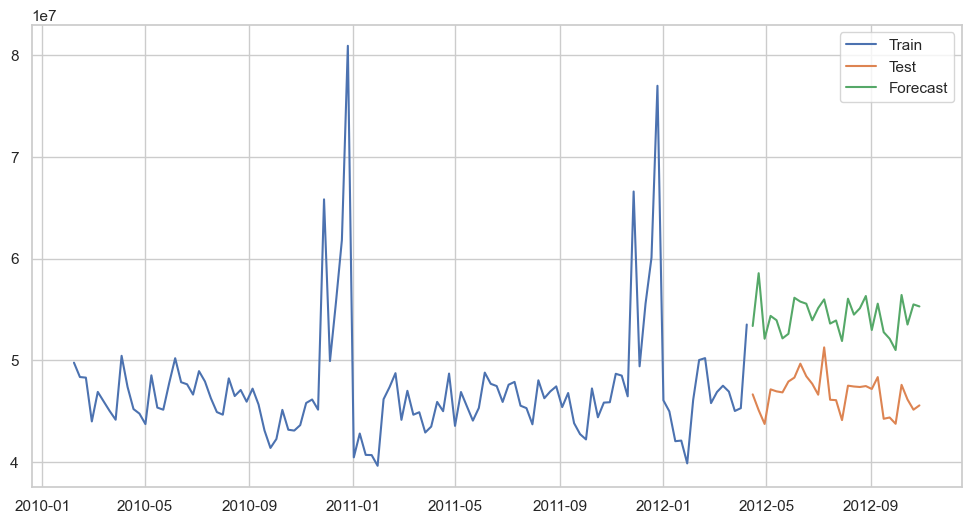

SARIMA MSE: 61349829905178.336
SARIMA RMSE: 7832613.223259421
SARIMA MAE: 7644145.771319303
SARIMA MAPE: 16.45942115144284


In [71]:
# Forecast
sarima_forecast = sarima_fit.forecast(steps=len(test))
sarima_forecast = pd.Series(sarima_forecast, index=test.index)

# Remove NaN values from the test and forecast series
test_clean = test.dropna()
sarima_forecast_clean = sarima_forecast.dropna()

# Ensure both series align correctly
common_index = test_clean.index.intersection(sarima_forecast_clean.index)
test_aligned = test_clean.loc[common_index]
sarima_forecast_aligned = sarima_forecast_clean.loc[common_index]

# Plot forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(sarima_forecast, label='Forecast')
plt.legend()
plt.show()

# Calculate error metrics
sarima_mse = mean_squared_error(test_aligned, sarima_forecast_aligned)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(test_aligned, sarima_forecast_aligned)
sarima_mape = np.mean(np.abs((test_aligned - sarima_forecast_aligned) / test_aligned)) * 100

print('SARIMA MSE:', sarima_mse)
print('SARIMA RMSE:', sarima_rmse)
print('SARIMA MAE:', sarima_mae)
print('SARIMA MAPE:', sarima_mape)


# Forecasted : predicting next 52 weeks 

In [72]:
# Predict future values
future_steps = 52  # For example, predicting 52 weeks into the future
future_forecast = sarima_fit.get_forecast(steps=future_steps)
future_forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(weeks=1), periods=future_steps, freq='W')
future_forecast_series = pd.Series(future_forecast.predicted_mean, index=future_forecast_index)

# Create traces for each series
trace_train = go.Scatter(x=train.index, y=train, mode='lines', name='Train')
trace_test = go.Scatter(x=test.index, y=test, mode='lines', name='Test')
trace_forecast = go.Scatter(x=sarima_forecast.index, y=sarima_forecast, mode='lines', name='Forecast')
trace_future_forecast = go.Scatter(x=future_forecast_series.index, y=future_forecast_series, mode='lines', name='Future Forecast', line=dict(dash='dash'))

# Add traces to the figure
fig = go.Figure([trace_train, trace_test, trace_forecast, trace_future_forecast])

# Update layout
fig.update_layout(title='Sales Forecast with SARIMA',
                  xaxis_title='Date',
                  yaxis_title='Sales')

# Show plot
fig.show()